In [231]:
# Import the libraries we need
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [232]:
# Load the data
file_path = 'Laptop_price.csv'  
data = pd.read_csv(file_path)

# Create a new DataFrame so we do not change the original, then clean the DataFrame by removing duplicates and dropping the brands table
new_df = data.dropna()
new_df.drop_duplicates(inplace = True)
# Drop the brand column as it is not necessary to train our unsupervised model
new_df.drop(['Brand'], axis=1, inplace=True)

# Manipulate the dataset of the DataFrame to convert the Russian Ruble currency to Canadian Dollars
new_df['Price'] *= (1.0 / 70.07)

# Round all floating point decimals to two decimal places
new_df['Processor_Speed'] = new_df['Processor_Speed'].apply(lambda x: round(x, 2))
new_df['Screen_Size'] = new_df['Screen_Size'].apply(lambda x: round(x, 2))
new_df['Weight'] = new_df['Weight'].apply(lambda x: round(x, 2))
new_df['Price'] = new_df['Price'].apply(lambda x: round(x,2))

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(new_df.head())

First 5 rows of the dataset:
   Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  Weight   Price
0             3.83        16               512        11.19    2.64  248.25
1             2.91         4              1000        11.31    3.26  451.09
2             3.24         4               256        11.85    2.03  132.60
3             3.81        16               512        12.28    4.57  248.85
4             3.27        32              1000        14.99    4.19  469.79


In [233]:
# Pick the features (columns) we’ll use to predict the price range
features = new_df[['Processor_Speed', 'RAM_Size']]

Text(0, 0.5, 'WCSS')

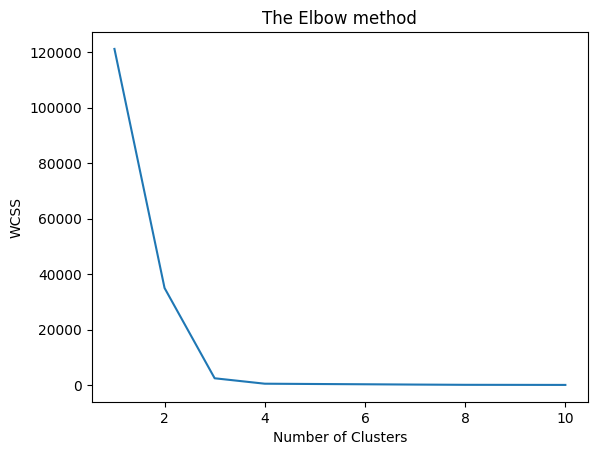

In [234]:
# Set up and run the K-Means clustering
# Use the Elbow method to find the optimal number of clusters and calculate the inertia (a distance based metric) for 1-10 clusters to visualize the point at which it starts decreasing linearly
# This will allow us to determine the "elbow" and is a good estimate for the best value for K based on our laptop data
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  
    kmeans.fit(features)  
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to see where the "elbow" effect appears with our clusters
plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [235]:
# Train the k-means model on the dataset with the optimal value of k, which would be 3. The elbow-like shape is formed between k=2 and k=3
kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans3 = kmeans3.fit_predict(features)
new_df['Cluster'] = kmeans3.fit_predict(features)

# Display the centers of each cluster and cluster labels for each data point
print("\nCluster Centers:")  
print(kmeans3.cluster_centers_)

# Determine the inertia of the cluster and the labels
print("Inertia: ", kmeans.inertia_) 
print("\nCluster Labels for each data point:")  
print(new_df['Cluster'].head())



Cluster Centers:
[[ 2.71087935  6.01226994]
 [ 2.74781022 32.        ]
 [ 2.83590717 16.        ]]
Inertia:  93.17835421388244

Cluster Labels for each data point:
0    2
1    0
2    0
3    2
4    1
Name: Cluster, dtype: int32


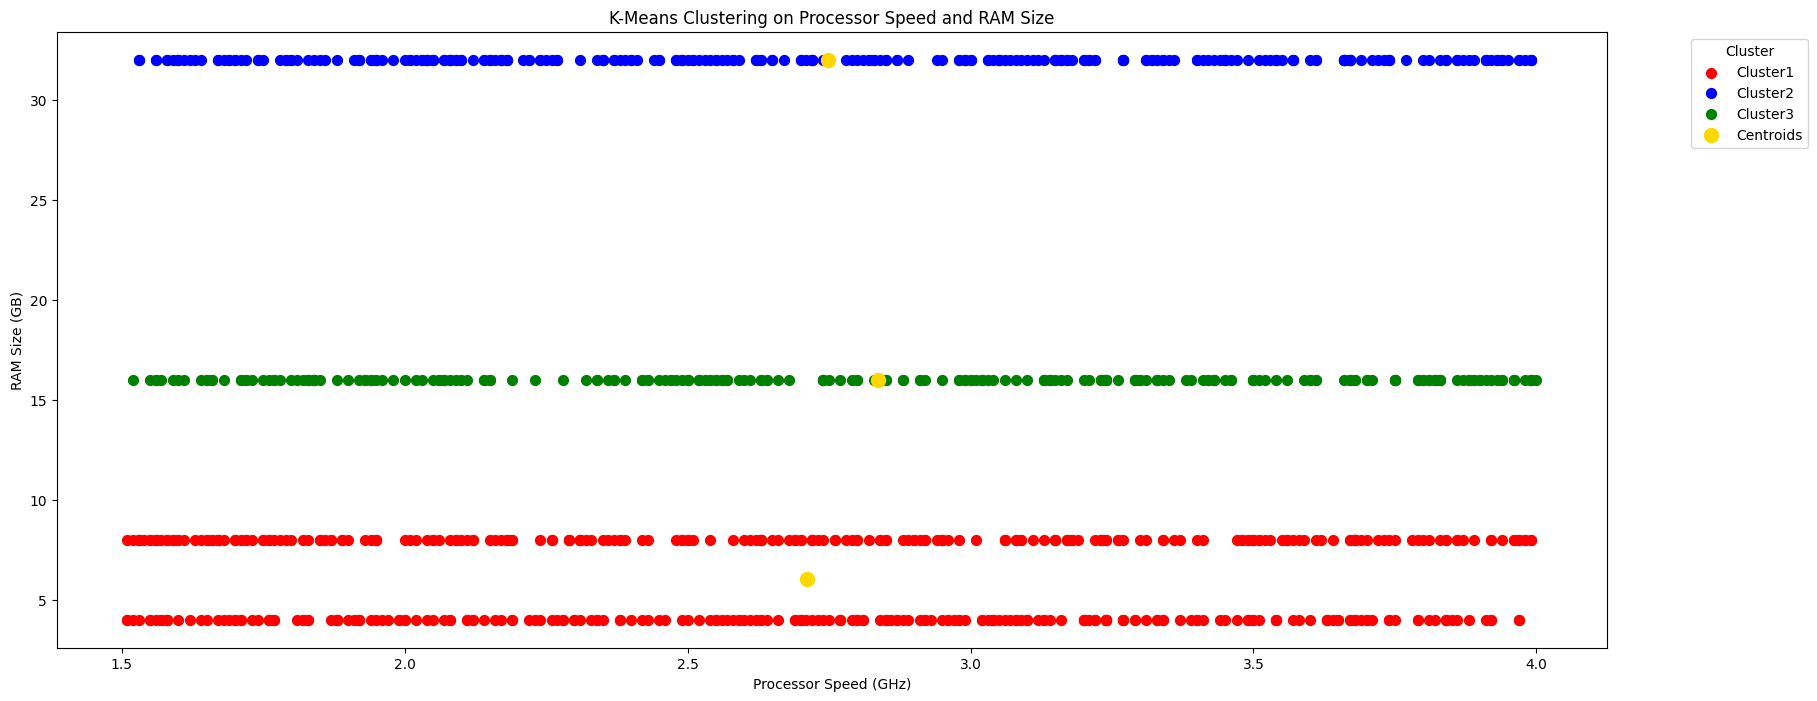

In [236]:
# Build the scatterplot with the different clusters calculated by the nonsupervised prediction
plt.figure(figsize=(20, 8))
# Fill the Scatter Plot with our three scattor groups based on our labels and data
plt.scatter(features.iloc[y_kmeans3 == 0, 0], features.iloc[y_kmeans3 == 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(features.iloc[y_kmeans3 == 1, 0], features.iloc[y_kmeans3 == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(features.iloc[y_kmeans3 == 2, 0], features.iloc[y_kmeans3 == 2, 1], s = 50, c = 'green', label = 'Cluster3')

# Fill the centroids of the Clusters
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='gold', label='Centroids')
# Label the Scatter plot
plt.title("K-Means Clustering on Processor Speed and RAM Size")
plt.xlabel("Processor Speed (GHz)")
plt.ylabel("RAM Size (GB)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [237]:
# Get a summary of each cluster's average feature values
# This helps us understand what characteristics each cluster has
print("\nSummary of clusters:")
print(new_df.groupby('Cluster')[['Processor_Speed', 'RAM_Size']].mean())


Summary of clusters:
         Processor_Speed  RAM_Size
Cluster                           
0               2.710879   6.01227
1               2.747810  32.00000
2               2.835907  16.00000


In [238]:
# Predict the model
k_means_pred = kmeans3.fit(features)
# Calculate the Silhoutte Score of our Clustering Model to assess the quality of the K-Means clusters fit on the data as we lack real ground data
score = silhouette_score(features, k_means_pred.labels_, metric='euclidean')
print("Silhouette Score: ", score)

Silhouette Score:  0.8393681265559912
